In [1]:
# https://www.scirp.org/Journal/PaperInformation.aspx?paperID=86337&
# https://www.epa.gov/climate-indicators/climate-change-indicators-atmospheric-concentrations-greenhouse-gases


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# https://www.epa.gov/climate-indicators/climate-change-indicators-us-and-global-temperature
# https://www.epa.gov/climate-indicators/climate-change-indicators-us-and-global-temperature#tab-5
# Figure 2. Temperatures Worldwide, 1901-2015
# Source: EPA's Climate Change Indicators in the United States: www.epa.gov/climate-indicators
# Data source: NOAA, 2016
# Web update: August 2016
# Units: °F

recent_temps = pd.read_csv('temperature_fig-2.csv')

In [4]:
recent_temps.head()

,Year,Earth's surface (land and ocean),Lower troposphere (measured by satellite) (UAH),Lower troposphere (measured by satellite) (RSS)
0,1901,-0.270,NaN,NaN
1,1902,-0.450,NaN,NaN
2,1903,-0.612,NaN,NaN
3,1904,-0.756,NaN,NaN
4,1905,-0.522,NaN,NaN


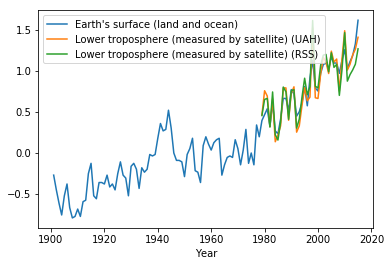

In [5]:
recent_temps.plot(x='Year')

In [6]:
recent_temps.rename(columns={'Year': "Year (negative values = BC)"}, inplace=True)
recent_temps.set_index('Year (negative values = BC)', inplace = True)

In [7]:
# convert to celsius!!  So strange its in F
# T(°C) = (T(°F) - 32) / 1.8 but no need to substract 32 becasue we are using differences anyways
# I'll drop the remote sensing measurements as they are pretty similar anyways
recent_temps['Temperature Difference in C'] = recent_temps["Earth's surface (land and ocean)"] / 1.8
recent_temps.drop(recent_temps.columns[[0,1,2]], axis=1, inplace=True)
recent_temps.head()

,Temperature Difference in C
Year (negative values = BC),
1901,-0.15
1902,-0.25
1903,-0.34
1904,-0.42
1905,-0.29


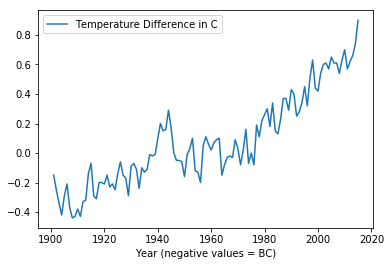

In [8]:
recent_temps.plot()

In [9]:
recent_temps.describe()

,Temperature Difference in C
count,115.000000
mean,0.082783
std,0.310629
min,-0.440000
25%,-0.145000
50%,0.020000
75%,0.290000
max,0.900000


In [10]:
# https://www.epa.gov/climate-indicators/climate-change-indicators-atmospheric-concentrations-greenhouse-gases
# https://www.epa.gov/sites/production/files/2016-08/ghg-concentrations_fig-1.csv
# Figure 1. Global Atmospheric Concentrations of Carbon Dioxide Over Time,,,,,,,,,,
# Source: EPA's Climate Change Indicators in the United States: www.epa.gov/climate-indicators,,,,,,,,,,
# Data source: Compilation of 10 underlying datasets,,,,,,,,,,
# Web update: April 2016,,,,,,,,,,
# Units: parts per million (ppm) of CO2
# direct measurements began in 1959
co2_measurements = pd.read_csv('carbon_dioxide_concentration.csv')

In [11]:
co2_measurements.set_index('Year (negative values = BC)', inplace=True)
co2_measurements.head()

,"EPICA Dome C and Vostok Station, Antarctica","Law Dome, Antarctica (75-year smoothed)","Siple Station, Antarctica","Mauna Loa, Hawaii","Barrow, Alaska","Cape Matatula, American Samoa","South Pole, Antarctica","Cape Grim, Australia","Lampedusa Island, Italy","Shetland Islands, Scotland"
Year (negative values = BC),,,,,,,,,,
-796562,191.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-795149,188.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-794517,189.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-793252,195.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-792658,199.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


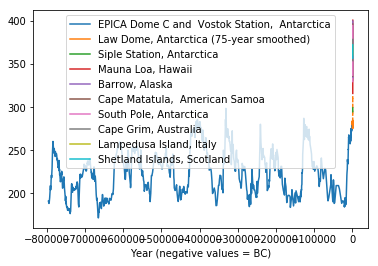

In [12]:
co2_measurements.plot()

In [13]:
# find the average measurement of CO2 by averaging the rows, and drop all rows but the average
co2_measurements['Average CO2'] = co2_measurements.mean(1)
co2_measurements.drop(co2_measurements.columns[[0,1,2,3,4,5,6,7,8,9]], axis=1, inplace=True)
co2_measurements.head()

,Average CO2
Year (negative values = BC),
-796562,191.0
-795149,188.4
-794517,189.3
-793252,195.2
-792658,199.4


In [14]:
# https://www.epa.gov/climate-indicators/climate-change-indicators-atmospheric-concentrations-greenhouse-gases
# https://www.epa.gov/sites/production/files/2016-08/ghg-concentrations_fig-2.csv
# Figure 2. Global Atmospheric Concentrations of Methane Over Time,,,,,
# Source: EPA's Climate Change Indicators in the United States: www.epa.gov/climate-indicators,,,,,
# Data source: Compilation of five underlying datasets,,,,,
# Web update: August 2016,,,,,
# Units: parts per billion (ppb) of methane
# up to 1980 is ice core measurements
# post 1981 is direct measurements
methane_measurements = pd.read_csv('methane_concentration.csv')

In [15]:
# round the years to integers.  The error in the dating means it doesn't matter if I round up or down or whatever.
year_int = methane_measurements['Year (negative values = BC)'].astype(int)
methane_measurements.head()

,Year (negative values = BC),"EPICA Dome C, Antarctica","Law Dome, Antarctica","Cape Grim, Australia","Mauna Loa, Hawaii","Shetland Islands, Scotland"
0,-797446.1,399.3,NaN,NaN,NaN,NaN
1,-796467.4,457.8,NaN,NaN,NaN,NaN
2,-795327.0,396.1,NaN,NaN,NaN,NaN
3,-794369.7,418.0,NaN,NaN,NaN,NaN
4,-792988.0,428.3,NaN,NaN,NaN,NaN


In [16]:
methane_measurements.drop(methane_measurements.columns[[0]], axis=1, inplace=True)
methane_measurements['Year (negative values = BC)'] = year_int
methane_measurements.set_index('Year (negative values = BC)', inplace=True)

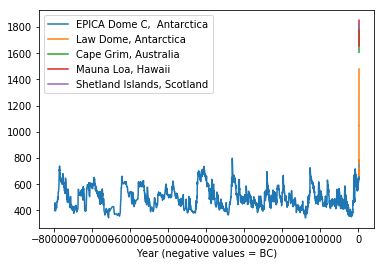

In [17]:
methane_measurements.plot()

In [18]:
# find the average measurement of Methane by averaging the rows, and drop all rows but the average
methane_measurements['Average Methane'] = methane_measurements.mean(1)
methane_measurements.drop(methane_measurements.columns[[0,1,2,3,4]], axis=1, inplace=True)
methane_measurements.head()

,Average Methane
Year (negative values = BC),
-797446,399.3
-796467,457.8
-795327,396.1
-794369,418.0
-792988,428.3


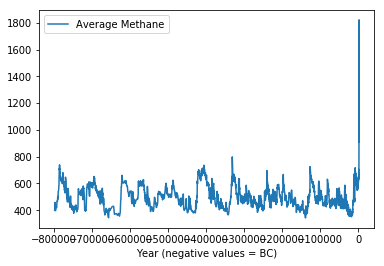

In [19]:
methane_measurements.plot()

In [20]:
# https://www.epa.gov/climate-indicators/climate-change-indicators-atmospheric-concentrations-greenhouse-gases
# https://www.epa.gov/sites/production/files/2016-08/ghg-concentrations_fig-3.csv
# Figure 3. Global Atmospheric Concentrations of Nitrous Oxide Over Time,,,,,,
# Source: EPA's Climate Change Indicators in the United States: www.epa.gov/climate-indicators,,,,,,
# Data source: Compilation of six underlying datasets,,,,,,
# Web update: August 2016,,,,,,
# Units: parts per billion (ppb) of nitrous oxide,,,,,,
n2o_measurements = pd.read_csv('nitrous_oxide_concentrations.csv')

In [21]:
n2o_measurements.set_index('Year (negative values = BC)', inplace=True)
n2o_measurements.head()

,"EPICA Dome C, Antarctica",Antarctica (Battle et al.),"Cape Grim, Australia","South Pole, Antarctica","Barrow, Alaska","Mauna Loa, Hawaii"
Year (negative values = BC),,,,,,
-796475,254.0,NaN,NaN,NaN,NaN,NaN
-794430,248.8,NaN,NaN,NaN,NaN,NaN
-792569,238.7,NaN,NaN,NaN,NaN,NaN
-790916,238.7,NaN,NaN,NaN,NaN,NaN
-789474,249.7,NaN,NaN,NaN,NaN,NaN


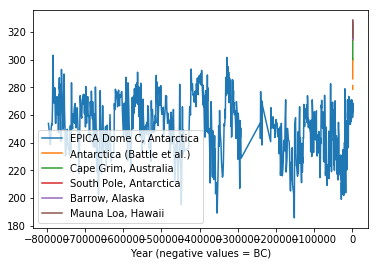

In [22]:
n2o_measurements.plot()

In [23]:
# find the average measurement of Methane by averaging the rows, and drop all rows but the average
n2o_measurements['Average N2O'] = n2o_measurements.mean(1)
n2o_measurements.drop(n2o_measurements.columns[[0,1,2,3,4,5]], axis=1, inplace=True)
n2o_measurements.head()

,Average N2O
Year (negative values = BC),
-796475,254.0
-794430,248.8
-792569,238.7
-790916,238.7
-789474,249.7


In [24]:
# EPICA Dome C Ice Core 800KYr deuterium data and temperature estimate
# A data frame with 5788 observations on the following 5 variables.
# Bag Bag number
# ztop Top depth (m)
# Age Years before 1950
# Deuterium Deuterium dD data
# dT Temperature difference from the average of the last 1000 years ~ -54.5degC
# Details Temperature was estimated from the deuterium data, after making various corrections.
# https://doi.pangaea.de/10.1594/PANGAEA.683655?format=html#download
epica_temps = pd.read_csv('EPICA Dome C Temperature data.csv')


In [25]:
epica_temps.describe()

,Depth ice/snow [m],Age model [ka],δD [‰ SMOW],delta T [°C],Sample ID
count,5800.000000,5800.000000,5785.000000,5788.000000,5800.000000
mean,1594.725000,190.016388,-417.796266,-4.577593,2900.500000
std,920.953062,192.546208,18.000193,3.448027,1674.460112
min,0.000000,-0.050000,-449.500000,-10.580000,1.000000
25%,797.362500,46.330250,-432.500000,-7.450000,1450.750000
50%,1594.725000,121.793500,-421.300000,-5.200000,2900.500000
75%,2392.087500,272.456500,-403.300000,-1.810000,4350.250000
max,3189.450000,801.662000,-361.200000,5.460000,5800.000000


In [26]:
# Multiply the age model by -1000 and add 1950 to push the age to current usage AD will be positive and BC will be negative
epica_temps['Year'] = epica_temps['Age model [ka]'] * (-1000) + 1950
# remove nan data for temperatures
epica_temps.dropna(subset=['delta T [°C]'], inplace=True)
# remove unused columns
epica_temps.drop(['Depth ice/snow [m]', 'δD [‰ SMOW]', 'Sample ID'], axis=1, inplace=True)


In [27]:
epica_temps.head()

,Age model [ka],delta T [°C],Year
12,0.038,0.88,1912.0
13,0.047,1.84,1903.0
14,0.055,3.04,1895.0
15,0.064,0.35,1886.0
16,0.073,-0.42,1877.0


In [28]:
# https://www.scirp.org/Journal/PaperInformation.aspx?paperID=86337&#ref15
#deuter_temps = pd.read_csv('deauterium_temps.csv')
#deuter_temps.dropna(subset=['Temperature'], inplace=True)
#deuter_temps.drop(['Bag', 'ztop', 'Deuterium'], axis=1, inplace=True)
#deuter_temps.describe()

In [29]:
#deuter_temps['Year'] = 1950 - deuter_temps['Age']
#deuter_temps.head()

In [30]:
# plot and compare deuter and epica data (I think they are the same)
#deuter_temps.plot(x='Year', y='Temperature')

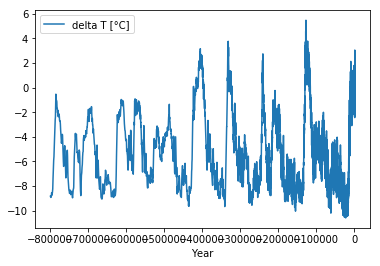

In [31]:
epica_temps.plot(x='Year', y='delta T [°C]')
# I'll use the epica temps as they are bit better labeled and cited

In [32]:
epica_temps.rename(columns={'Age model [ka]': "age", 'delta T [°C]': "Temperature Difference in C"}, inplace=True)
epica_temps['Year (negative values = BC)'] = epica_temps['Year'].astype(int)
epica_temps.set_index('Year (negative values = BC)', inplace = True)
epica_temps.drop(epica_temps.columns[[0, 2]], axis=1, inplace=True)
epica_temps.head()

,Temperature Difference in C
Year (negative values = BC),
1912,0.88
1903,1.84
1895,3.04
1886,0.35
1877,-0.42


In [33]:
epica_temps.describe()

,Temperature Difference in C
count,5788.000000
mean,-4.577593
std,3.448027
min,-10.580000
25%,-7.450000
50%,-5.200000
75%,-1.810000
max,5.460000


In [34]:
# I will need to join the datasets and interpolate any missing data
# first lets normalize the 2 temperature datasets, from ice cores and direct measurements to be sure they are on the same scale
temps = pd.merge(epica_temps, recent_temps, how='outer', left_index=True, right_index=True, suffixes=(' Ice Core', ' Direct'))
temps.tail(125)

,Temperature Difference in C Ice Core,Temperature Difference in C Direct
Year (negative values = BC),,
1810,0.38,NaN
1821,-1.11,NaN
1831,-0.55,NaN
1840,0.79,NaN
1850,-0.52,NaN
1859,0.05,NaN
1868,0.05,NaN
1877,-0.42,NaN
1886,0.35,NaN


In [35]:
# match on the 1903 temp add 2.18 deg to the recent temps
temps['Adjusted Temperature Difference in C Direct'] = 2.18 + temps['Temperature Difference in C Direct']
temps['Temperature Difference in C combined'] = temps[['Adjusted Temperature Difference in C Direct', 'Temperature Difference in C Ice Core']].mean(1)

In [36]:
temps.tail(125)

,Temperature Difference in C Ice Core,Temperature Difference in C Direct,Adjusted Temperature Difference in C Direct,Temperature Difference in C combined
Year (negative values = BC),,,,
1810,0.38,NaN,NaN,0.380
1821,-1.11,NaN,NaN,-1.110
1831,-0.55,NaN,NaN,-0.550
1840,0.79,NaN,NaN,0.790
1850,-0.52,NaN,NaN,-0.520
1859,0.05,NaN,NaN,0.050
1868,0.05,NaN,NaN,0.050
1877,-0.42,NaN,NaN,-0.420
1886,0.35,NaN,NaN,0.350


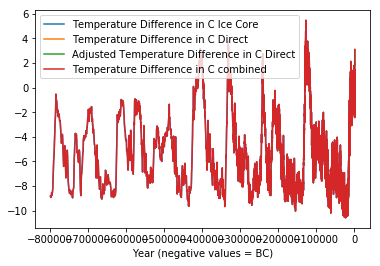

In [37]:
temps.plot()

In [38]:
temps.describe()

,Temperature Difference in C Ice Core,Temperature Difference in C Direct,Adjusted Temperature Difference in C Direct,Temperature Difference in C combined
count,5788.000000,115.000000,115.000000,5901.000000
mean,-4.577593,0.082783,2.262783,-4.446381
std,3.448027,0.310629,0.310629,3.541866
min,-10.580000,-0.440000,1.740000,-10.580000
25%,-7.450000,-0.145000,2.035000,-7.410000
50%,-5.200000,0.020000,2.200000,-5.120000
75%,-1.810000,0.290000,2.470000,-1.570000
max,5.460000,0.900000,3.080000,5.460000


In [39]:
# merge the greenhouse gasses as well
first = pd.merge(co2_measurements, n2o_measurements, how='outer', left_index=True, right_index=True, suffixes=(' CO2', ' NO2'))
greenhouse = pd.merge(first, methane_measurements, how='outer', left_index=True, right_index=True)
greenhouse.head(120)

,Average CO2,Average N2O,Average Methane
Year (negative values = BC),,,
-797446,NaN,NaN,399.300000
-796562,191.0,NaN,NaN
-796475,NaN,254.0,NaN
-796467,NaN,NaN,457.800000
-795327,NaN,NaN,396.100000
-795149,188.4,NaN,NaN
-794517,189.3,NaN,NaN
-794430,NaN,248.8,NaN
-794369,NaN,NaN,418.000000


In [40]:
greenhouse.describe()

,Average CO2,Average N2O,Average Methane
count,1359.000000,964.000000,2207.000000
mean,243.906280,255.956529,550.526313
std,38.853701,23.137159,187.906543
min,171.600000,185.500000,342.400000
25%,214.700000,241.300000,452.366667
50%,239.500000,257.550000,516.400000
75%,273.700000,269.000000,601.366667
max,400.830000,328.181111,1819.157500


In [41]:
dataset = pd.merge(greenhouse, temps, how='outer', left_index=True, right_index=True)
dataset.drop(columns=['Temperature Difference in C Ice Core', 'Temperature Difference in C Direct', 'Adjusted Temperature Difference in C Direct'], inplace=True)
dataset

,Average CO2,Average N2O,Average Methane,Temperature Difference in C combined
Year (negative values = BC),,,,
-799711,NaN,NaN,NaN,-8.82
-798639,NaN,NaN,NaN,-8.92
-797551,NaN,NaN,NaN,-8.88
-797446,NaN,NaN,399.300000,NaN
-796562,191.000000,NaN,NaN,NaN
-796493,NaN,NaN,NaN,-8.54
-796475,NaN,254.000000,NaN,NaN
-796467,NaN,NaN,457.800000,NaN
-795458,NaN,NaN,NaN,-8.73


In [42]:
# Not all the data is filled across every row.  What happens if we drop every row with a na?
dataset_no_na = dataset.dropna()
dataset_no_na.describe()
# Whoa, only 42 rows left... must find another method.

,Average CO2,Average N2O,Average Methane,Temperature Difference in C combined
count,42.000000,42.000000,42.000000,42.000000
mean,359.856730,310.424929,1658.045572,2.558571
std,23.073823,10.607401,166.258409,0.257820
min,319.620000,291.200000,1260.300000,2.030000
25%,344.513437,304.179583,1640.713229,2.380000
50%,359.448571,310.620958,1751.634444,2.590000
75%,377.925333,318.803370,1770.200312,2.787500
max,400.830000,328.181111,1819.157500,3.080000


In [43]:
# Fill out the datasets so there are no NaN.  The machine learning models won't be able to make predictions without data.
# I will start with a linear interpolation of the datasets.
# https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html
# https://chrisalbon.com/machine_learning/preprocessing_dates_and_times/handling_missing_values_in_time_series/
dataset['CO2 interpolated'] = dataset['Average CO2'].interpolate()
dataset['N2O interpolated'] = dataset['Average N2O'].interpolate()
dataset['Methane interpolated'] = dataset['Average Methane'].interpolate()
dataset['Temp interpolated'] = dataset['Temperature Difference in C combined'].interpolate()
dataset

,Average CO2,Average N2O,Average Methane,Temperature Difference in C combined,CO2 interpolated,N2O interpolated,Methane interpolated,Temp interpolated
Year (negative values = BC),,,,,,,,
-799711,NaN,NaN,NaN,-8.82,NaN,NaN,NaN,-8.820000
-798639,NaN,NaN,NaN,-8.92,NaN,NaN,NaN,-8.920000
-797551,NaN,NaN,NaN,-8.88,NaN,NaN,NaN,-8.880000
-797446,NaN,NaN,399.300000,NaN,NaN,NaN,399.300000,-8.766667
-796562,191.000000,NaN,NaN,NaN,191.000000,NaN,413.925000,-8.653333
-796493,NaN,NaN,NaN,-8.54,190.566667,NaN,428.550000,-8.540000
-796475,NaN,254.000000,NaN,NaN,190.133333,254.000000,443.175000,-8.603333
-796467,NaN,NaN,457.800000,NaN,189.700000,253.257143,457.800000,-8.666667
-795458,NaN,NaN,NaN,-8.73,189.266667,252.514286,426.950000,-8.730000


In [44]:

# get rid of the end points that can't interpolate
dataset_interpolated = dataset[['Temp interpolated', 'CO2 interpolated', 'N2O interpolated', 'Methane interpolated']]
dataset_interpolated.dropna(inplace=True)
dataset_interpolated.describe()
# Whoa, only 42 rows left... must find another method.

C:\Users\caeeb\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Temp interpolated,CO2 interpolated,N2O interpolated,Methane interpolated
count,10027.000000,10027.000000,10027.000000,10027.000000
mean,-4.330042,232.725870,250.698969,525.826914
std,3.443839,30.636031,19.281199,126.590982
min,-10.580000,171.600000,185.500000,342.400000
25%,-7.280000,206.700000,237.312500,448.015385
50%,-4.905000,230.378082,253.200000,503.025000
75%,-1.452500,258.652500,264.030952,587.742390
max,5.460000,400.830000,328.181111,1819.157500


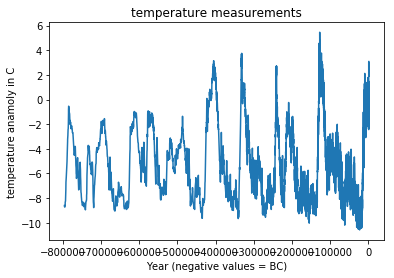

In [52]:
dataset_interpolated['Temp interpolated'].plot()
plt.ylabel('temperature anamoly in C')
plt.title('temperature measurements')
plt.savefig('temperatures.png')

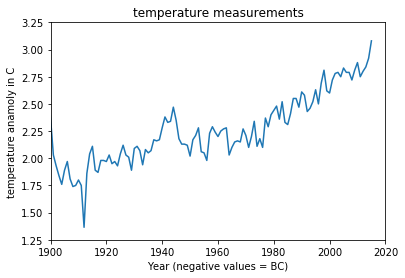

In [77]:
dataset_interpolated['Temp interpolated'].plot()
plt.ylabel('temperature anamoly in C')
plt.title('temperature measurements')
plt.xlim(1900, 2020)
plt.ylim(1.25, 3.25)
plt.savefig('recent temperatures.png')

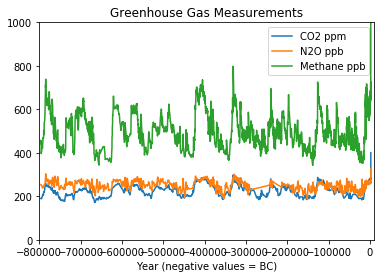

In [67]:
plotdata = dataset_interpolated[['CO2 interpolated', 'N2O interpolated', 'Methane interpolated']]
plotdata.rename(columns={'CO2 interpolated': 'CO2 ppm','N2O interpolated': "N2O ppb", 'Methane interpolated': "Methane ppb",}, inplace=True)
plotdata.plot()
plt.title('Greenhouse Gas Measurements')
plt.ylim(0, 1000)
plt.xlim(-800000, 10000)
plt.savefig('greenhouse gases.png')

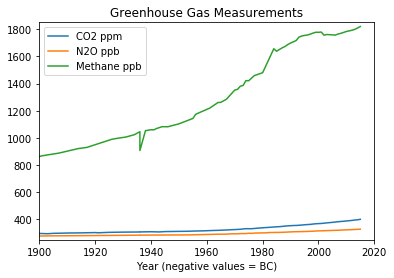

In [79]:
plotdata.plot()
plt.title('Greenhouse Gas Measurements')
plt.ylim(250, 1850)
plt.xlim(1900, 2020)
plt.savefig('recent greenhouse gases.png')

In [46]:
dataset_interpolated.to_csv('dataset_interpolated.csv')